In [158]:
import gym

import mdptoolbox, mdptoolbox.example

import time

import pandas as pd 
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt 

from hiive import mdptoolbox
import hiive.mdptoolbox.example
import hiive.mdptoolbox.mdp


### Forest Problem (Non GridWorld Example)

- Creates transition probability P, size (Action X State X State)
- Creates Reward Matrix R, size (State X Action)
- Action is either WAIT (Action = 0) or CUT (Action = 1). There is some probability p that the fire burns the forest. 
- The states of the forest are the ages of how old the forest is since last cut or burn, where S = {0, 1, ..., S-1}

- S: The number of states, the number of years old the forest can be 
- r1: the reward when the forest is in its oldest state and action WAIT is performed 
- r2: the reward whne the forest is in its oldest state and action CUT is performed
- p: the probability that a wild fire occurs 

State Size 100

In [159]:
P, R = hiive.mdptoolbox.example.forest(S = 100, r1 = 4, r2 = 2, p = 0.1, is_sparse = False)

pi = hiive.mdptoolbox.mdp.PolicyIteration(P,R,0.9)
pi_result = pi.run()
print(pi.policy)

vi = hiive.mdptoolbox.mdp.ValueIteration(P,R,0.9)
vi_result = vi.run()
print(vi.policy)

ql = hiive.mdptoolbox.mdp.QLearning(P, R, 0.9)
ql_result = ql.run()
print(ql.policy)

(0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
(0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
(0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)


In [160]:
#print(P[0, :, :])

In [161]:
# Take action 0, while in State 0, and end up with these transition probabilities to these states: 10% to 0, 90% to state 1
P[0, 0, :]

array([0.1, 0.9, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ])

Policy Iteration Final Iteration

In [162]:
pi_result[-1]

{'State': None,
 'Action': None,
 'Reward': 23.172433847048566,
 'Error': 1.7763568394002505e-15,
 'Time': 0.008555173873901367,
 'Max V': 23.172433847048566,
 'Mean V': 5.704639509766346,
 'Iteration': 10}

Value Iteration Final Iteration

In [163]:
vi_result[-1]

{'State': None,
 'Action': None,
 'Reward': 23.089675091923866,
 'Error': 0.0013319585461291084,
 'Time': 0.002476215362548828,
 'Max V': 23.089675091923866,
 'Mean V': 5.626418022627985,
 'Iteration': 39}

Q Learning Final Iteration

In [164]:
ql_result[-1]

{'State': 42,
 'Action': 0,
 'Reward': 0.0,
 'Error': 0.0018655333195532209,
 'Time': 0.3567180633544922,
 'Alpha': 0.001,
 'Epsilon': 0.1,
 'Gamma': 0.9,
 'Max V': 2.6017495726935382,
 'Mean V': 0.06216413439155377,
 'Iteration': 10000}

In [165]:
def chart_reward_iter(results, title):
    iter_list = []
    result_list = []

    for i in range(0, len(results)):
        iter_list.append(results[i]['Iteration'])
        result_list.append(results[i]['Reward'])

    plt.plot(iter_list, result_list)
    plt.xlabel("Iteration")
    plt.ylabel("Reward")
    plt.title(title)
    plt.show()

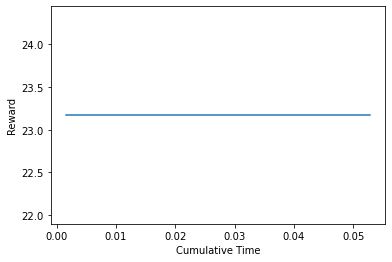

In [166]:
chart_reward_time(pi_result)

In [197]:
def compare_reward(pi, vi, num_states, discount_rate):
    
    pi_iter_list = []
    pi_reward_list = []
    pi_time_list = []
    vi_iter_list = []
    vi_reward_list = []
    vi_time_list = []
    
    for i in range(0, len(pi)):
        pi_iter_list.append(pi[i]['Iteration'])
        pi_reward_list.append(pi[i]['Reward'])
        pi_time_list.append(pi[i]['Time'])
    pi_cumsum_list = list(accumulate(pi_time_list))
    
    for i in range(0, len(vi)):
        vi_iter_list.append(vi[i]['Iteration'])
        vi_reward_list.append(vi[i]['Reward'])
        vi_time_list.append(vi[i]['Time'])
    vi_cumsum_list = list(accumulate(vi_time_list))
    
    plt.clf()
    plt.plot(pi_iter_list, pi_reward_list, label = "Policy Iteration")
    plt.plot(vi_iter_list, vi_reward_list, label = "Value Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Reward")
    plt.title("Compare the effect of Iteration on Reward \n between Policy and Value Iteration \n with States: " + str(num_states) + " Discount Rate: " + str(discount_rate))
    plt.legend()
    plt.show()
    
    plt.clf()
    plt.plot(pi_cumsum_list, pi_reward_list, label = "Policy Iteration")
    plt.plot(vi_cumsum_list, vi_reward_list, label = "Value Iteration")
    plt.xlabel("Cumulative Time")
    plt.ylabel("Reward")
    plt.title("Compare the effect of Cumulative Time on Reward \n between Policy and Value Iteration \n with States: " + str(num_states) + " Discount Rate: " + str(discount_rate))
    plt.legend()
    plt.show()
    

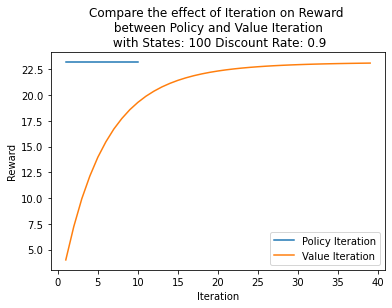

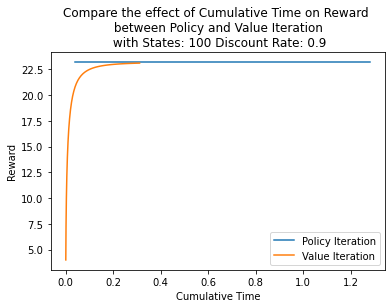

In [198]:
compare_reward(pi_result, vi_result, 100, .90)

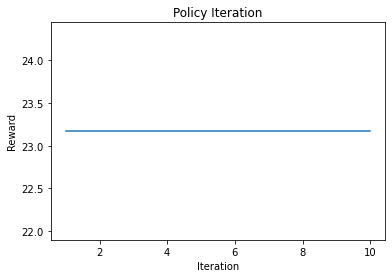

In [199]:
chart_reward_iter(pi_result, "Policy Iteration")

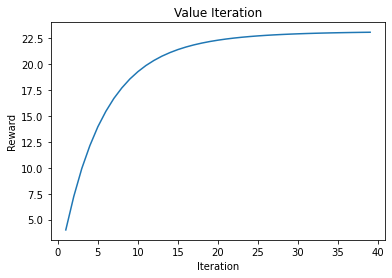

In [200]:
chart_reward_iter(vi_result, "Value Iteration")

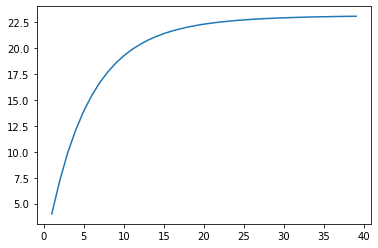

In [201]:
iter_list = []
result_list = []

for i in range(0, len(vi_result)):
    iter_list.append(vi_result[i]['Iteration'])
    result_list.append(vi_result[i]['Reward'])
    
plt.plot(iter_list, result_list)
plt.show()

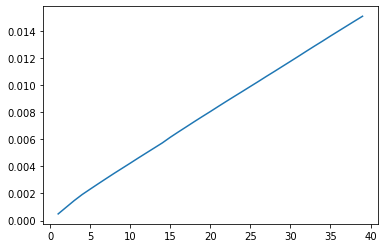

In [202]:
iter_list = []
result_list = []

for i in range(0, len(vi_result)):
    iter_list.append(vi_result[i]['Iteration'])
    result_list.append(vi_result[i]['Time'])
    
plt.plot(iter_list, result_list)
plt.show()

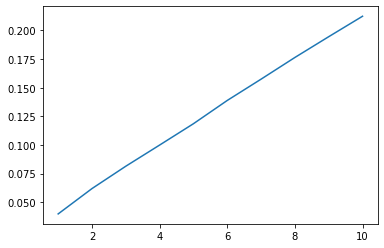

In [203]:
iter_list = []
result_list = []

for i in range(0, len(pi_result)):
    iter_list.append(pi_result[i]['Iteration'])
    result_list.append(pi_result[i]['Time'])
    
plt.plot(iter_list, result_list)
plt.show()

#### How many iterations does it take to converge? 


In [204]:
print("Policy Iteration", pi_result[-1]['Iteration'])
print("Value Iteration", vi_result[-1]['Iteration'])

Policy Iteration 10
Value Iteration 39


#### Which one converges faster?

In [205]:
time_list = []
for i in range(0, len(pi_result)):
    time_list.append(pi_result[i]['Time']) 
print("Policy Iteration Time:", sum(time_list))

time_list = []
for i in range(0, len(vi_result)):
    time_list.append(vi_result[i]['Time'])
print("Value Iteration Time:", sum(time_list))


Policy Iteration Time: 1.2812018394470215
Value Iteration Time: 0.3110344409942627


#### How did you choose to define convergence?

The defaults 

#### Do they converge to the same answer?

In [206]:
vi.policy == pi.policy

True

#### Which converged to a higher reward?

In [207]:
print("Policy Iteration", pi_result[-1]['Reward'])
print("Value Iteration", vi_result[-1]['Reward'])

Policy Iteration 23.172433847048566
Value Iteration 23.089675091923866


#### How did the number of states affect things, if at all?

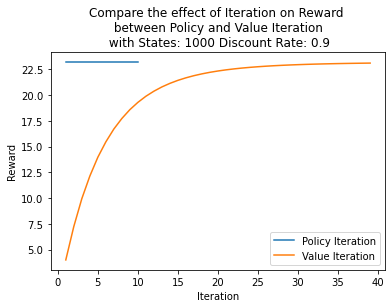

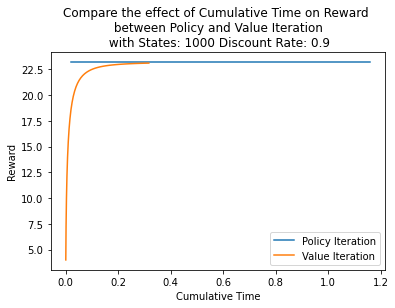

How many iterations does it take to converge?
Policy Iteration: 10
Value Iteration: 39
Which one converges faster? Why?
Policy Iteration Time: 1.1602392196655273
Value Iteration Time: 0.31684398651123047
Do they converge to the same answer?
True
How did the number of states affect things, if at all?


In [219]:
P, R = hiive.mdptoolbox.example.forest(S = 1000, r1 = 4, r2 = 2, p = 0.1, is_sparse = False)

pi = hiive.mdptoolbox.mdp.PolicyIteration(P,R,0.9)
pi_result = pi.run()

vi = hiive.mdptoolbox.mdp.ValueIteration(P,R,0.9)
vi_result = vi.run()

ql = hiive.mdptoolbox.mdp.QLearning(P, R, 0.9)
ql_result = ql.run()

compare_reward(pi_result, vi_result, 1000, 0.9)

print("How many iterations does it take to converge?")
print("Policy Iteration:", pi_result[-1]['Iteration'])
print("Value Iteration:", vi_result[-1]['Iteration'])


print("Which one converges faster? Why?")
time_list = []
for i in range(0, len(pi_result)):
    time_list.append(pi_result[i]['Time']) 
print("Policy Iteration Time:", sum(time_list))
time_list = []
for i in range(0, len(vi_result)):
    time_list.append(vi_result[i]['Time'])
print("Value Iteration Time:", sum(time_list))

print("Do they converge to the same answer?")
print(pi.policy == vi.policy)

print("How did the number of states affect things, if at all?")

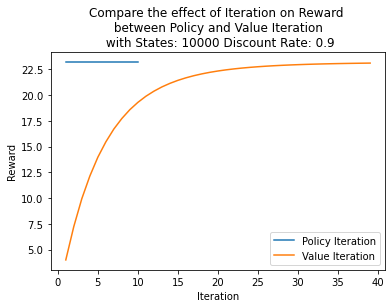

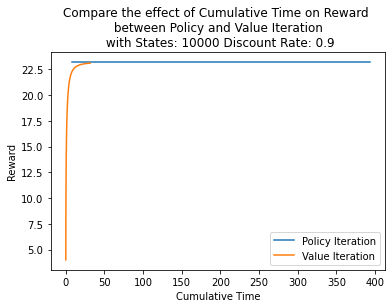

How many iterations does it take to converge?
Policy Iteration: 10
Value Iteration: 39
Which one converges faster? Why?
Policy Iteration Time: 393.5781452655792
Value Iteration Time: 31.694469213485718
Do they converge to the same answer?
True
How did the number of states affect things, if at all?


In [221]:
P, R = hiive.mdptoolbox.example.forest(S = 10000, r1 = 4, r2 = 2, p = 0.1, is_sparse = False)

pi = hiive.mdptoolbox.mdp.PolicyIteration(P,R,0.9)
pi_result = pi.run()

vi = hiive.mdptoolbox.mdp.ValueIteration(P,R,0.9)
vi_result = vi.run()

ql = hiive.mdptoolbox.mdp.QLearning(P, R, 0.9)
ql_result = ql.run()

compare_reward(pi_result, vi_result, 10000, 0.9)

print("How many iterations does it take to converge?")
print("Policy Iteration:", pi_result[-1]['Iteration'])
print("Value Iteration:", vi_result[-1]['Iteration'])


print("Which one converges faster? Why?")
time_list = []
for i in range(0, len(pi_result)):
    time_list.append(pi_result[i]['Time']) 
print("Policy Iteration Time:", sum(time_list))
time_list = []
for i in range(0, len(vi_result)):
    time_list.append(vi_result[i]['Time'])
print("Value Iteration Time:", sum(time_list))

print("Do they converge to the same answer?")
print(pi.policy == vi.policy)

print("How did the number of states affect things, if at all?")